Let us import all the necessory packages required.

In [2]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

Importing the dataset

In [3]:
from sklearn.datasets import load_iris

dataset = load_iris()
X = dataset.data
Y = dataset.target

In [4]:
# Creating a dataframe
X = pd.DataFrame(X, columns=dataset.feature_names)
Y = pd.DataFrame(Y, columns=['target'])

### **Train Test Split**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.66)

### **Data Visualization**

In [6]:
X_train.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,0.091743,0.855223,0.793003
sepal width (cm),0.091743,1.000000,-0.272457,-0.238076
petal length (cm),0.855223,-0.272457,1.000000,0.960456
petal width (cm),0.793003,-0.238076,0.960456,1.000000


We will now visualize this correlation

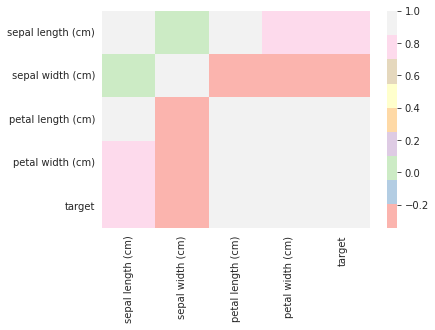

In [7]:
sns.heatmap(data=pd.concat([X_train, Y_train], axis=1).corr(), cmap="Pastel1")

In [35]:
sample_df = pd.concat([X_train, Y_train], axis=1)
map_dict = {0: 'setosa', 1: 'versicolour', 2: 'virginica'}
sample_df['target'] = sample_df['target'].map(map_dict)

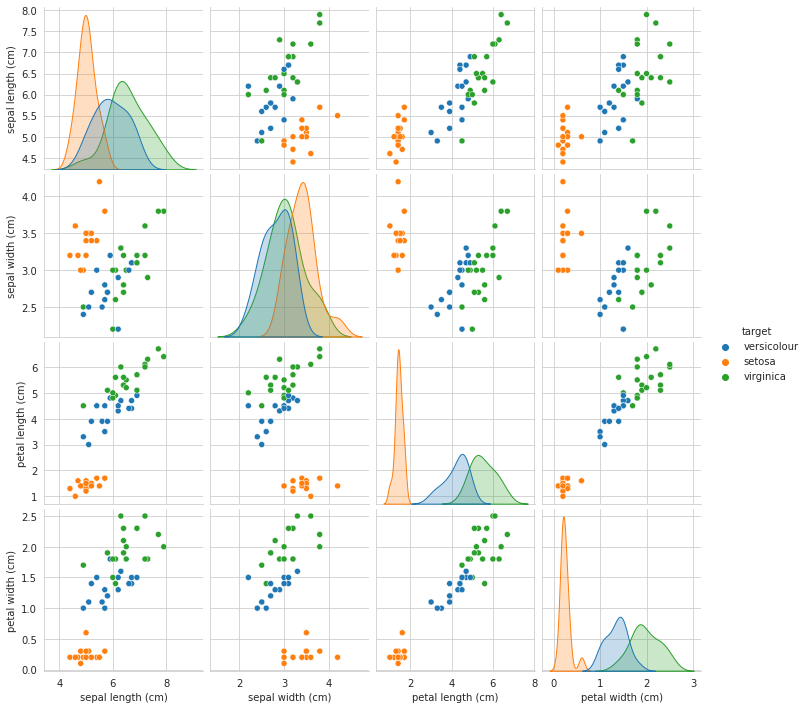

In [42]:
sns.pairplot(sample_df, hue='target')

It is evident that all these data points are highly related to the target column and hence machine learning model would be accuarate.

The challenge here would be saperate versicolour and virginica as the other one is really separated from each other.

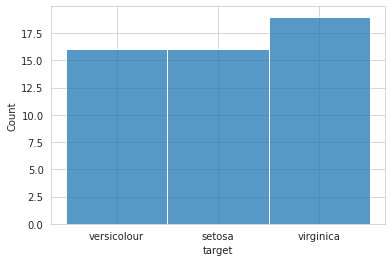

In [40]:
sns.histplot(sample_df['target'])

Almost equal counts. Hence no outliers and no less sample space. Lets go into modelling now.

### **Modeling**

#### **Logistic Regression**

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [78]:
# Creating the model
lreg = LogisticRegression()

# Training the model
lreg.fit(X_train, Y_train['target'])

# Using the trained model for prediction
lreg_pred = lreg.predict(X_test)

# Checking the accuracy
print(accuracy_score(lreg_pred, Y_test))

0.9696969696969697


**WE GOT IT TO BE CLOSE TO 97% ACCURATE.**